**UNLOCKING PROPERTY INSIGHTS.

Overview of the project
Develop a predictive model that accurately estimates the sale price of residential properties in King County based on their 
attributes.



Business Problem



In [290]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Data exploration,preparation and modelling.

In [291]:
# Import the datasets

df = pd.read_csv('data/kc_house_data.csv')


In [292]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [293]:
#Investigating the structure of our df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [294]:
#Displaying the columns in the df
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [295]:
#Displaying the first 10 rows of the df
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [296]:
df.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21588,9834201367,1/26/2015,429000.0,3,2.00,1490,1126,3.0,NO,NONE,...,8 Good,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [297]:
#Create a second dataframe, drop the columns we won't use in our analysis
df_2 = df.drop(columns =['date', 'view', 'sqft_above','sqft_basement', 'yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], axis=1)

In [298]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [299]:
#Checking for null values in df_2
df_2.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [300]:
#Filling the null values in the waterfront category with NO, assuming that the fields were left empty due to absence of a waterfront
df_2['waterfront'].fillna('NO', inplace=True)
df_2['waterfront'].unique()

array(['NO', 'YES'], dtype=object)

In [301]:
#Checking for duplicates 
duplicates = df_2.duplicated()
num_duplicates = duplicates.sum()
df_2.drop_duplicates(subset=['id']) #Dropping the duplicated rows

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NO,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NO,Average,8 Good,2004


In [302]:
#Checking for unique values in the condition column
print('Condition of the houses before mapping')
print(df_2['condition'].unique())
#Changing the data type of unique values from string to int using the.map() function
condition_mapping = {'Very Good':5, 'Good': 4, 'Average':3, 'Fair':2, 'Poor':1}
df_2['condition'] = df_2['condition'].map(condition_mapping )#applying the mapping changes
print("Conditions after mapping")
print(df_2['condition'].unique())

Condition of the houses before mapping
['Average' 'Very Good' 'Good' 'Poor' 'Fair']
Conditions after mapping
[3 5 4 1 2]


In [303]:
#Checking and changing the 'waterfront' column from strings to int
print("Waterfront values before mapping:", df_2['waterfront'].unique())
#Changing the data type of unique values from string to int using the.map() function
waterfront_mapping ={'NO':0, 'YES':1}
df_2['waterfront'] = df_2['waterfront'].map(waterfront_mapping  )#applying the mapping changes
print("Waterfront values after mapping: ",df_2['waterfront'].unique())

Waterfront values before mapping: ['NO' 'YES']
Waterfront values after mapping:  [0 1]


In [304]:
#Displaying count of each grade in the df_2
df_2['grade'].unique().sum()

'7 Average6 Low Average8 Good11 Excellent9 Better5 Fair10 Very Good12 Luxury4 Low3 Poor13 Mansion'

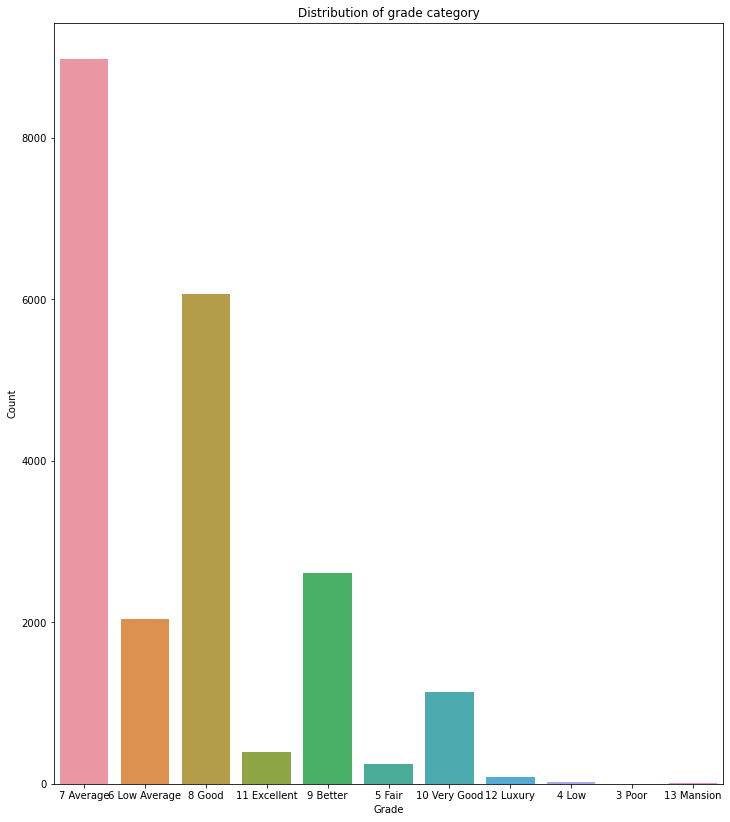

In [305]:
#Plot a count plot for grade
plt.figure(figsize=(12, 14))
sns.countplot(data=df_2, x='grade')
plt.title("Distribution of grade category")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

In [306]:
filtered_df = df[df['condition'] == 'Very Good'][['price', 'condition']]

In [307]:
filtered_df

,price,condition
3,604000.0,Very Good
25,233000.0,Very Good
27,667000.0,Very Good
49,1350000.0,Very Good
62,505000.0,Very Good
...,...,...
19588,663000.0,Very Good
19604,850000.0,Very Good
19857,320000.0,Very Good
19889,500000.0,Very Good


Visualizations

In [308]:
#checking for the correlation between the features(columns)
correlation_matrix = df_2.corr()
correlation_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,-0.023803,0.021617
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.053953
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.155670
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.507173
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.318152
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.052946
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.489193
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,-0.024487
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.361592
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,1.000000


In [309]:
correlation_matrix.shape

(10, 10)

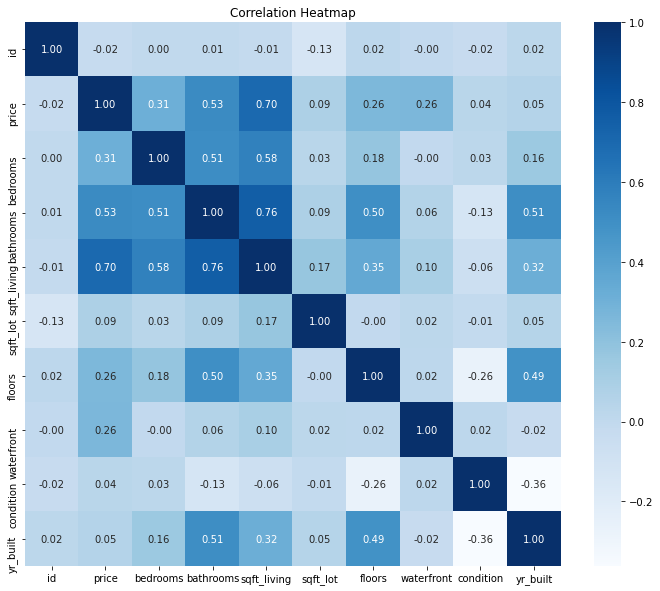

In [310]:
#Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

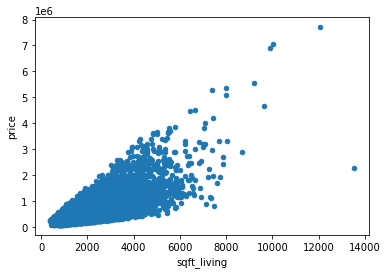

In [311]:
#Plotting a scatter plot, to investigate whether there is a correlation between sqft_living and price
df.plot.scatter(x="sqft_living", y="price")

In [312]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  int64  
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.8+ MB


##PERFORMING LINEAR REGRESSION

In [313]:
#From the above data, our target variable will be price
#Since it has the highest correlation wth sqft_living, we will use sqft_living as our independent variable for univariate analysis

In [314]:
#Building a simple linear regression model using statsmodel
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'price ~ sqft_living '
model = ols(formula, data=df_2).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:32:28   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      

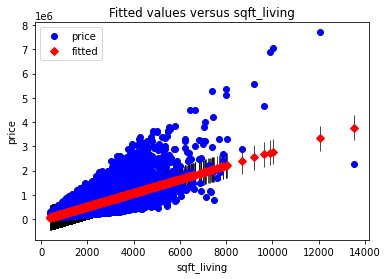

In [315]:
#Visualizing the bove results
sm.graphics.plot_fit(model, "sqft_living")# Displays a scatter plot of values displayed by the model
plt.show()

In [316]:
#Perforing multiple linear regression with sqft_living and bathroooms as our independent variables
formula2 = 'price ~ sqft_living + bathrooms + bedrooms+ waterfront + floors'
model2 = ols(formula2, data=df_2).fit()
summary2 = model2.summary()
print(summary2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5082.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        06:32:30   Log-Likelihood:            -2.9899e+05
No. Observations:               21597   AIC:                         5.980e+05
Df Residuals:                   21591   BIC:                         5.980e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.834e+04   7442.380      9.182      

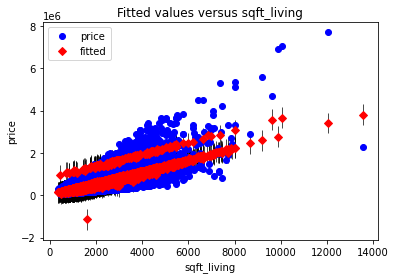

In [317]:
sm.graphics.plot_fit(model2, "sqft_living")# Displays a scatter plot of values displayed by the model
plt.show()

In [318]:
#Modelling using sklearn
#Preparing the data for training
X = df_2['sqft_living'].values.reshape(-1, 1)
y = df_2['price'].values .reshape(-1, 1)


In [319]:
#Splitting our model using sklearn
from sklearn.model_selection import train_test_split
price_train, price_test, sqft_living_train, sqft_living_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [320]:
#Training our model using sklearn
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(price_train, sqft_living_train)

LinearRegression()

In [321]:
print("Linear regression intercept:", regressor.intercept_)
print("Linear regression intercept:", regressor.coef_)

Linear regression intercept: [-52451.32215242]
Linear regression intercept: [[285.14706588]]


In [324]:
#Making predictions using our test data, to see how accurate our model is
price_predict = regressor.predict(sqft_living_test)

accuracy_comp_df = pd.DataFrame({'Actual': price_test.flatten(), 'Predicted':price_predict.flatten()})

accuracy_comp_df.describe()

,Actual,Predicted
count,4320.000000,4.320000e+03
mean,2062.790509,1.520732e+08
std,898.091120,9.784523e+07
min,470.000000,2.561078e+07
25%,1420.000000,9.119176e+07
50%,1900.000000,1.282637e+08
75%,2520.000000,1.825130e+08
max,9640.000000,1.331584e+09


In [325]:
#Multiple linear regression using sklearn
X2 = df_2[['sqft_living','bedrooms','bathrooms','floors','waterfront']].values
y2 = df_2['price'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

regressor2 = LinearRegression()
regressor2.fit(X2_train, y2_train)

print("Linear regression intercept:", regressor2.intercept_)
print("Linear regression intercept:", regressor2.coef_)


Linear regression intercept: 62493.29942407017
Linear regression intercept: [ 3.03622561e+02 -5.13163083e+04  6.22808191e+03  7.63737803e+02
  7.92231026e+05]


## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:
